In [1]:
import matplotlib.pyplot as plt
import csv

In [2]:
data_path = "CelebA"

{1: 29, 2: 8, 3: 25, 4: 22, 5: 20, 6: 24, 7: 24, 8: 26, 9: 5, 10: 19, 11: 10, 12: 25, 13: 22, 14: 30, 15: 30, 16: 9, 17: 30, 19: 20, 20: 19, 21: 30, 22: 30, 23: 30, 24: 20, 25: 30, 26: 2, 27: 26, 28: 23, 29: 19, 30: 18, 31: 30, 32: 30, 33: 22, 34: 26, 35: 16, 36: 11, 37: 9, 38: 30, 39: 25, 40: 22, 41: 23, 42: 12, 43: 15, 44: 5, 45: 22, 46: 24, 47: 30, 48: 24, 49: 28, 50: 19, 51: 20, 52: 24, 53: 23, 54: 22, 55: 29, 57: 20, 58: 25, 59: 30, 60: 19, 61: 29, 63: 21, 64: 29, 65: 30, 66: 30, 67: 24, 68: 28, 69: 30, 70: 22, 71: 14, 72: 5, 73: 24, 75: 6, 77: 23, 78: 30, 79: 29, 80: 28, 81: 29, 82: 30, 83: 19, 84: 21, 85: 30, 86: 24, 87: 28, 88: 21, 89: 29, 90: 20, 91: 14, 92: 21, 93: 21, 94: 30, 95: 30, 96: 28, 98: 25, 99: 21, 101: 29, 102: 20, 103: 29, 105: 21, 107: 28, 110: 25, 111: 2, 112: 12, 113: 28, 115: 22, 116: 29, 117: 24, 118: 27, 119: 24, 121: 29, 122: 30, 123: 26, 124: 27, 126: 29, 127: 12, 128: 28, 129: 24, 130: 28, 131: 7, 132: 29, 133: 27, 134: 21, 135: 27, 136: 15, 137: 24, 138:

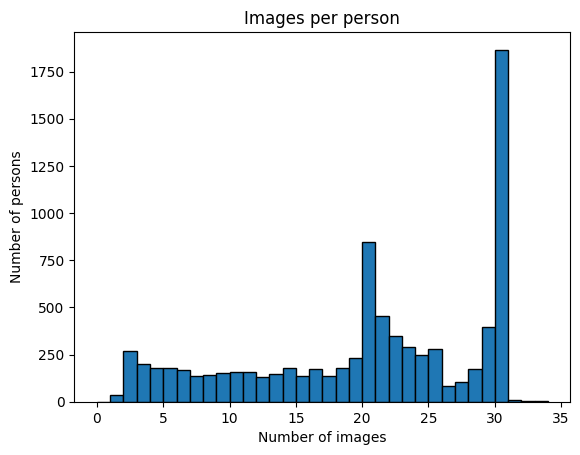

In [3]:
from collections import Counter

with open(f"{data_path}/annotations.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)

    id_counter = Counter()
    for row in reader:
        if row['partition'] == '0':
            id_counter[int(row['id'])] += 1
        

    sorted_id_counts = dict(sorted(id_counter.items(), key=lambda item: int(item[0])))
    print(sorted_id_counts)
    max_id = max(sorted_id_counts, key=sorted_id_counts.get)
    average_count = sum(sorted_id_counts.values()) / len(sorted_id_counts)

    print(f"ID of person with most images: {max_id}, Count: {sorted_id_counts[max_id]}")
    print(f"Average number of images per person: {average_count:.2f}")
    
    
    plt.hist(sorted_id_counts.values(), bins=range(0, max(sorted_id_counts.values())), edgecolor='black')
    plt.xlabel('Number of images')
    plt.ylabel('Number of persons')
    plt.title('Images per person')
    plt.show()


In [4]:
with open(f"{data_path}/annotations.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)
    attribute_counter = Counter()
    for row in reader:
        for key, value in row.items():
            if key not in ['filename', 'id', 'partition'] and row['partition'] == '0':
                attribute_counter[key] += int(value)

    for attribute, count in attribute_counter.most_common():
        print(f"{count}\t- {attribute}")


135779	- No_Beard
126788	- Young
83603	- Attractive
78486	- Mouth_Slightly_Open
78080	- Smiling
76437	- Wearing_Lipstick
73645	- High_Cheekbones
68261	- Male
62555	- Heavy_Makeup
51982	- Wavy_Hair
46101	- Oval_Face
44846	- Pointy_Nose
43278	- Arched_Eyebrows
39213	- Big_Lips
38906	- Black_Hair
38341	- Big_Nose
33947	- Straight_Hair
33280	- Bags_Under_Eyes
33192	- Brown_Hair
30362	- Wearing_Earrings
24685	- Bangs
24267	- Blond_Hair
23386	- Bushy_Eyebrows
19764	- Wearing_Necklace
18869	- Narrow_Eyes
18177	- 5_o_Clock_Shadow
13040	- Receding_Hairline
11890	- Wearing_Necktie
10525	- Rosy_Cheeks
10521	- Eyeglasses
10337	- Goatee
9389	- Chubby
9156	- Sideburns
8362	- Blurry
8039	- Wearing_Hat
7571	- Double_Chin
7005	- Pale_Skin
6896	- Gray_Hair
6642	- Mustache
3713	- Bald


In [5]:
with open(f"{data_path}/annotations.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)
    attribute_counter = {}
    for row in reader:
        if row['partition'] == '0':
            person_id = int(row['id'])
            if person_id not in attribute_counter:
                attribute_counter[person_id] = Counter()
            for key, value in row.items():
                if key not in ['filename', 'id', 'partition']:
                    attribute_counter[person_id][key] += int(value)


In [8]:
attribute_counter2 = Counter()
for person_id in sorted(attribute_counter.keys()):
    print(f"ID: {person_id}, Images: {id_counter[person_id]}")
    counter = attribute_counter[person_id]
    for attribute, count in counter.items():
        if count > 0 and count < id_counter[person_id]:
            print(f"{count}\t- {attribute}")
            attribute_counter2[attribute] += 1

ID: 1, Images: 29
10	- 5_o_Clock_Shadow
1	- Arched_Eyebrows
8	- Attractive
12	- Bags_Under_Eyes
6	- Big_Nose
1	- Black_Hair
3	- Blond_Hair
1	- Blurry
22	- Brown_Hair
3	- Eyeglasses
6	- High_Cheekbones
17	- Mouth_Slightly_Open
17	- Narrow_Eyes
1	- Pale_Skin
10	- Pointy_Nose
14	- Smiling
15	- Straight_Hair
3	- Wearing_Hat
20	- Young
ID: 2, Images: 8
1	- Arched_Eyebrows
7	- Attractive
1	- Bags_Under_Eyes
2	- Bangs
3	- Brown_Hair
1	- Bushy_Eyebrows
3	- Heavy_Makeup
3	- High_Cheekbones
3	- Mouth_Slightly_Open
3	- Narrow_Eyes
3	- Oval_Face
1	- Pointy_Nose
4	- Smiling
3	- Straight_Hair
1	- Wavy_Hair
1	- Wearing_Earrings
4	- Wearing_Lipstick
1	- Wearing_Necklace
ID: 3, Images: 25
17	- Attractive
1	- Big_Lips
10	- Big_Nose
3	- Black_Hair
9	- Bushy_Eyebrows
1	- Chubby
1	- Double_Chin
6	- Eyeglasses
20	- Goatee
3	- Heavy_Makeup
7	- High_Cheekbones
4	- Mouth_Slightly_Open
1	- No_Beard
15	- Oval_Face
1	- Pointy_Nose
6	- Receding_Hairline
11	- Sideburns
8	- Smiling
4	- Wavy_Hair
8	- Wearing_Earrings

In [7]:
for attribute, count in attribute_counter2.most_common():
        print(f"{count}\t- {attribute}")

7587	- Mouth_Slightly_Open
7426	- Smiling
7135	- High_Cheekbones
5637	- Oval_Face
5633	- Attractive
5426	- Wavy_Hair
5353	- Straight_Hair
5279	- Bags_Under_Eyes
5086	- Pointy_Nose
4864	- Brown_Hair
4810	- Narrow_Eyes
4564	- Black_Hair
4357	- Arched_Eyebrows
4101	- Wearing_Earrings
3938	- Bangs
3901	- Big_Nose
3898	- Heavy_Makeup
3804	- Wearing_Necklace
3578	- Wearing_Lipstick
3435	- Blurry
3386	- Bushy_Eyebrows
2945	- Receding_Hairline
2791	- Pale_Skin
2738	- Blond_Hair
2664	- Wearing_Hat
2613	- Rosy_Cheeks
2598	- Eyeglasses
2504	- Big_Lips
2431	- No_Beard
2415	- Wearing_Necktie
2276	- 5_o_Clock_Shadow
1822	- Chubby
1692	- Double_Chin
1544	- Goatee
1540	- Young
1480	- Sideburns
1170	- Gray_Hair
1135	- Mustache
544	- Bald
507	- Male
